In [23]:
import pandas as pd

try:
  print("Reading test data...", end='')
  df_test_data = pd.read_csv("case_data/BikeRentalDaily_test.csv", delimiter=";")
  print(" success")
  print(df_test_data.head())

  print("\nReading training data...", end='')
  df_train_data = pd.read_csv("case_data/clean_training_data.csv", delimiter=";")
  print(" success")
  print(df_train_data.head())
except FileNotFoundError:
  print("Fehler beim lesen der Datei. Falscher Pfad?")

# This is used to store the mean absolute errors together with the calculation
# algorithm in the form [method, mean_absolute_error]. Later in this section
# this is used to generate a visual overview of the results
results_method_mae = []

# Features that will be used for model generation
feature_items=["instant","season","yr","mnth","weathersit","temp","atemp","hum","windspeed"]

# Fix data
train_data_without_nan = df_train_data.dropna()
x_train = train_data_without_nan.filter(items=feature_items).values
y_train = train_data_without_nan.cnt.values

# Question: why do we need to do this?
test_data_without_nan = df_test_data.dropna()
x_test = test_data_without_nan.filter(items=feature_items).values
y_test = test_data_without_nan.cnt.values

print(y_test)

Reading test data... success
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0      299  26.10.2011     4.0   0    10        0        3           1   
1      458  02.04.2012     2.0   1     4        0        1           1   
2      687  17.11.2012     4.0   1    11        0        6           0   
3      346  12.12.2011     4.0   0    12        0       -1           1   
4      291  18.10.2011     4.0   0    10        0        2           1   

   weathersit     temp     atemp        hum  windspeed  leaflets  \
0           2  19.3667  0.472846  108.06255   0.148642       605   
1           1  17.3565  0.427513   75.65220   0.312139       518   
2           1  13.0000  0.326383   81.81255   0.179729       766   
3           1   9.5333  0.270196        NaN   0.063450       739   
4           2  21.3000  0.522721  105.25005   0.110087       463   

   price reduction  casual  registered   cnt  
0                0     404        3490  3894  
1                0    1

In [24]:
# Lineare Regression
from sklearn import linear_model
reg = linear_model.LinearRegression()

reg.fit(x_train, y_train)

print("Regression coefficients: ",reg.coef_)

#Predict all test examples
ypred = reg.predict(x_test)
#Show first 10 prediction results
print(ypred[0:10])

Regression coefficients:  [-7.42536630e-01  7.21132277e+02  2.51072212e+03 -6.48180587e+01
 -3.78434159e+02  7.94085816e+01  1.10200654e+03 -5.42120027e+00
 -1.09752414e+03]
[3758.90076842 5263.31422461 5736.34875289 4030.88641737 1464.35836178
 6852.31655676 6297.44395001 4979.56232045 4937.04942035 4294.63499168]


In [25]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, ypred)
print('MAE: %.3f' % mae)

results_method_mae.append(["linear regression", mae])

MAE: 887.670


In [26]:
# Visualize linear regression results
import matplotlib.pyplot as plt

def viz_linear():
    plt.scatter(x_train, y_train, color='red')
    plt.plot(x_train, reg.predict(x_train), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
# viz_linear()

In [27]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score

poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(x_train)
pol_reg = linear_model.LinearRegression()
pol_reg.fit(X_poly, y_train)

ypred = pol_reg.predict(poly_reg.transform(x_test))

# Question: Warum kommen hier negative werte raus? 
print(ypred[0:10])

mae = mean_absolute_error(y_test, ypred)
print('MAE: %.3f' % mae)

results_method_mae.append(["polynominal regression", mae])

[3894.00000066 5935.99999957 5629.00000024 3064.01213672  908.21601515
 7039.99999984 2341.12009677 4444.18056118 5042.03021187 5177.67184553]
MAE: 393.258


In [28]:
# Macht es sinn ein LSTM model für time series forecasting zu verwenden?
# spielt die zeit komponente eine rolle bei uns? 

In [29]:
from sklearn.neighbors import KNeighborsRegressor

#Initialize and fit KNN regression
KNN_reg = KNeighborsRegressor(n_neighbors=1)
KNN_reg.fit(x_train, y_train)

#Predict all test examples
ypred = KNN_reg.predict(x_test)

mae = mean_absolute_error(y_test, ypred)
print('MAE: %.3f' % mae)

results_method_mae.append(["KNN", mae])


MAE: 319.217


In [30]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=1)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=1)

ypred = lasso_reg.predict(x_test)

mae = mean_absolute_error(y_test, ypred)
print('MAE: %.3f' % mae)

results_method_mae.append(["Lasso", mae])

MAE: 893.904


c:\users\rapha\pycharmprojects\xydian-data-science-case-study\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.195e+07, tolerance: 4.174e+04
  model = cd_fast.enet_coordinate_descent(


In [31]:
df_results = pd.DataFrame(results_method_mae, columns = ['Method', 'MAE'])

# Show results of methods
df_results

,Method,MAE
0,linear regression,887.669590
1,polynominal regression,393.257799
2,KNN,319.217391
3,Lasso,893.903780


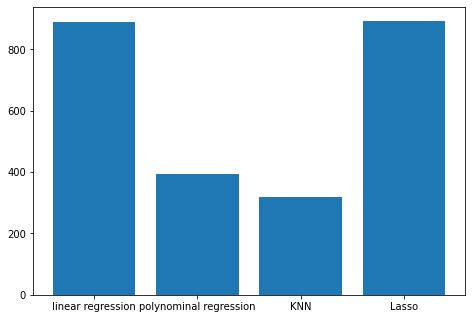

In [32]:
import matplotlib.pyplot as plt

# Visualize resuts of data frame 

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(df_results.Method,df_results.MAE)
plt.show()